# **Stellar Object Classification**

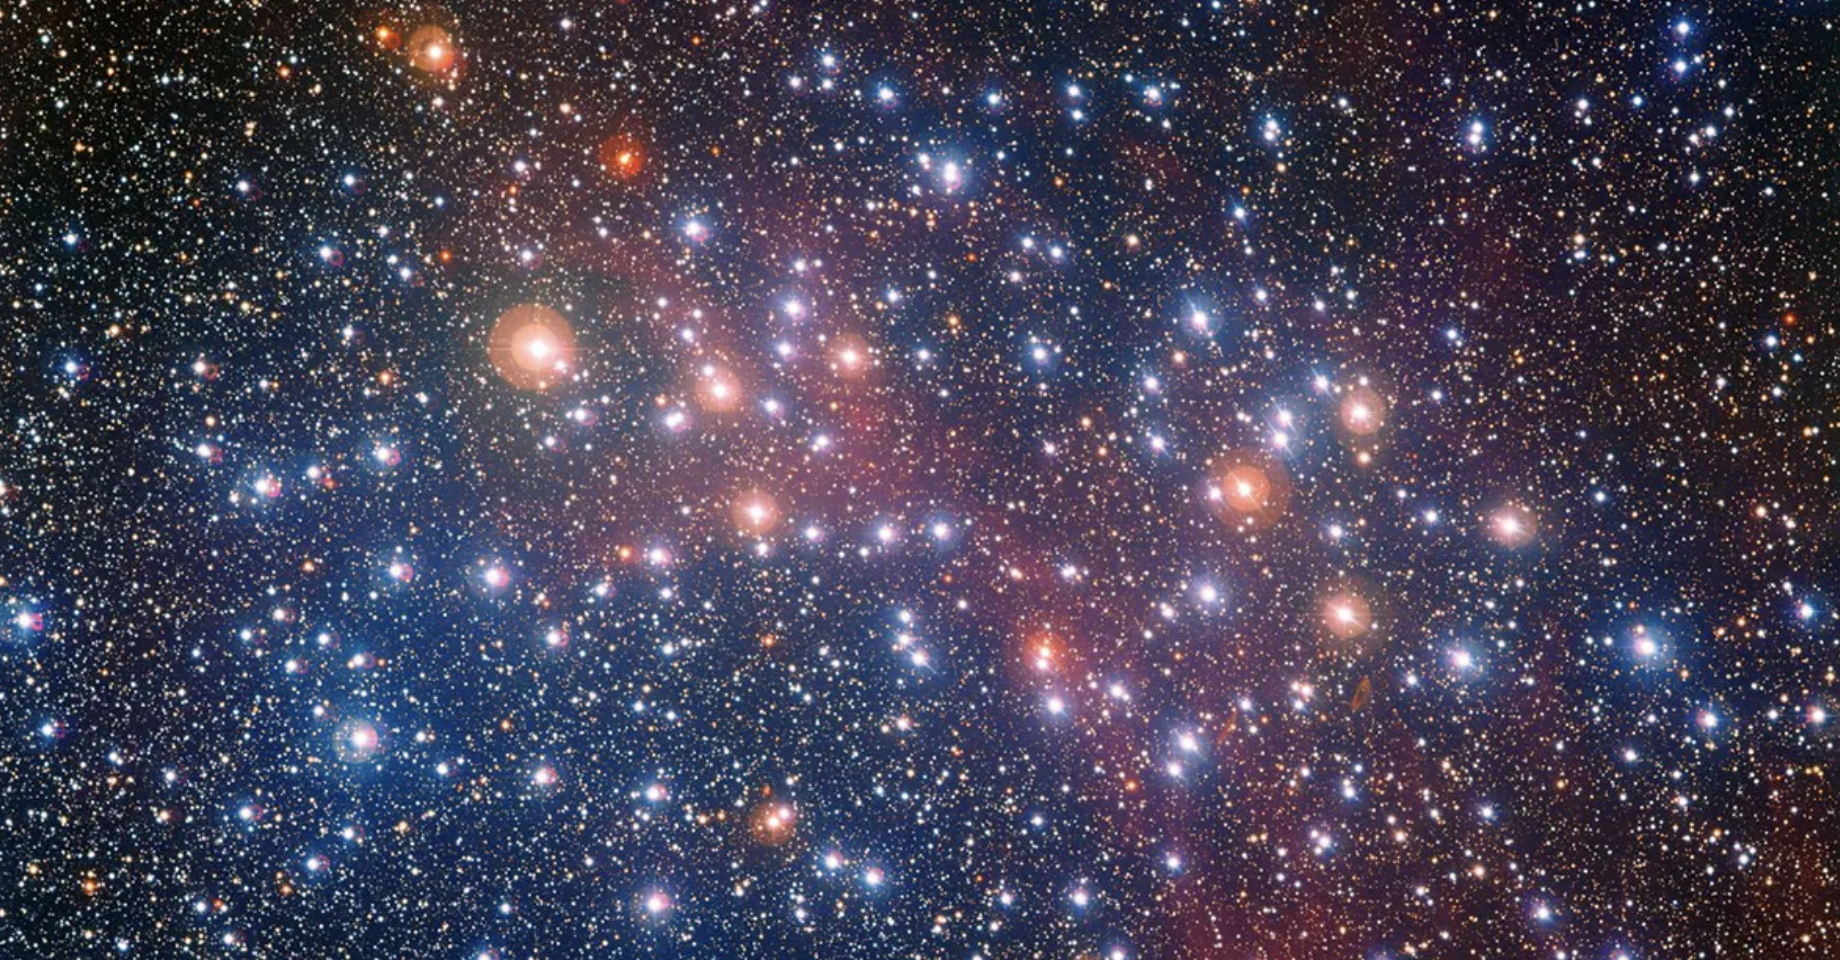

In astronomy, stellar refers to anything related to stars, including their formation, evolution, characteristics, and classification. Stars are fundamental to our understanding of the universe, as they are the primary sources of light and energy for galaxies, including our own Milky Way. Stellar studies help astronomers determine the age, composition, and size of stars, as well as their life cycles, from birth in nebulae to their eventual death, which can result in phenomena like supernovae, black holes, or white dwarfs. By classifying stars based on their properties (such as temperature, luminosity, and size), astronomers can learn about the processes that govern the universe’s structure and evolution. Stellar research also aids in determining the habitability of planets by understanding the type of star they orbit, which is crucial for finding potentially life-supporting environments beyond Earth.

---

The goal of this analysis is to study three primary types of stellar objects—Galaxies, Stars, and Quasi-Stellar Objects (Quasars or QSOs). By examining their unique characteristics and spectroscopic results, researchers aim to determine the type of object and facilitate further study of these entities in the context of the broader physical universe.

# **Initial Analysis**

The corresponding dataset consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar. The features of data is described as follows:

*   **obj_ID**= Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
*   **alpha** = Right Ascension angle (at J2000 epoch)
*   **delta** = Declination angle (at J2000 epoch)
*   **u** = Ultraviolet filter in the photometric system
*   **g** = Green filter in the photometric system
*   **r** = Red filter in the photometric system
*   **z** = Infrared filter in the photometric system
*   **i** = Near Infrared filter in the photometric system
*   **run_ID** = Run Number used to identify the specific scan
*   **rereun_ID** = Rerun Number to specify how the image was
*  **processed cam_col** = Camera column to identify the scanline within the run
field_ID = Field number to identify each field

*   **spec_obj_ID** = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
*   **class** = object class (galaxy, star or quasar object)
redshift = redshift value based on the increase in wavelength
*   **plate** = plate ID, identifies each plate in SDSS
*   **MJD **= Modified Julian Date, used to indicate when a given piece of SDSS data was taken
* **fiber_ID** = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation


# **Question 1**:
To start the data nalayis, we need to know the data, type of data, type of features. Using Python coding, read the data, and present the type of features. Also, visualize the number of the samples in each class using plot.

In [ ]:
# Data Handling & Numerical Computations
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis
from scipy.stats import zscore

# Preprocessing Tools
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Model Selection & Splitting
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

I aggregated all the import here for better readability and ease of use to understand what all libraries went behind the analysis and avoid redundancy.

Shape of dataset: (100000, 18)

First 5 rows:
          obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.6347

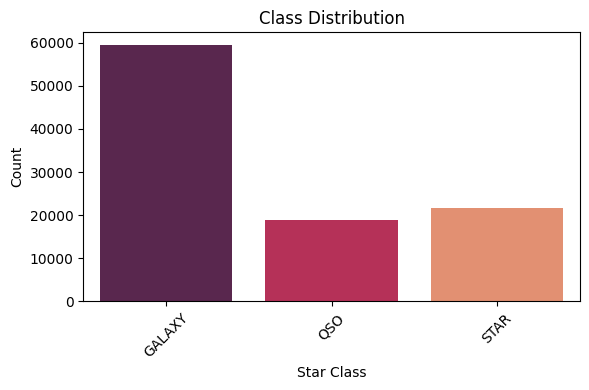

In [ ]:
path = '/content/star_classification-1-1-1.csv'
df = pd.read_csv(path)

# Basic overview
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:\n", df.head())

# Info on data types and nulls
print("\nInfo:\n")
df.info()

# Statistical summary of the dataset
print("\nDescribe:\n", df.describe())

# Feature type classification
print("\nData Types of Each Feature:")
print(df.dtypes)

def classify_feature_type(series):
    unique_values = series.nunique()
    if pd.api.types.is_numeric_dtype(series):
        if unique_values < 20:
            return 'Discrete Numeric'
        else:
            return 'Continuous Numeric'
    else:
        return 'Categorical'

feature_types = pd.DataFrame({'Feature': df.columns, 'Type': [classify_feature_type(df[col]) for col in df.columns]})

print("\nFeature Type Classification (Categorical vs Discrete vs Continuous):")
print(feature_types)

# Checking Class distribution plot
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df, hue='class', palette='rocket', legend=False)
plt.title('Class Distribution')
plt.xlabel('Star Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In the initial step I have loaded the 100000 rows data and inspected the headings and first 5 rows of each feature, the shape of the data was found to be (100000,18). Which include one feature that is Categorical, and that is "class". To make distiction I have checked for unique values < 20.

I have also described the data to know more about their distribution and mean.

I have checked if we have any null values in the dataset, which we don't. The dataset was found to be above 13.7 MB.

At last I have plotted a Class Distribution plot that shows the following distributions :-
- Galaxy: 59,445
- QSO: 18,961
- Star: 21,594

Additionally, placeholder values like -9999 observed in features like u, g, and z indicate potential data quality issues that must be cleaned before further analysis.

# **Question 2**:
Can you discuss the necessary steps in data pre-processing and develop them?

**The Steps are as follows:**
- Load and inspect the dataset to understand its structure and class distribution
- Drop unnecessary or non-informative columns (e.g., IDs). Can keep and remove or not use later as well.
- Encode categorical labels into numerical form for model compatibility
- Check for and handle any missing or null values
- Normalize features using standard scaling to bring them to the same range
- Perform stratified sampling to create a balanced subset for faster processing
- Split the data into training and testing sets (e.g., 80-20) while preserving class proportions

In [ ]:
# Checking for Missing Values and Duplicates

df_cleaned = df.copy()

# Checking missing values
print("Missing values per column (before handling):")
print(df_cleaned.isnull().sum())

# Checking duplicates
num_duplicates = df_cleaned.duplicated().sum()
print("\nNumber of duplicate rows before preprocessing:", num_duplicates)

# Dropping duplicate rows if any
if num_duplicates > 0:
    df_cleaned = df_cleaned.drop_duplicates()
    print("Duplicates dropped. New shape:", df_cleaned.shape)

Missing values per column (before handling):
obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

Number of duplicate rows before preprocessing: 0


Here, I am checking for missing values per column and checking duplicates. I have found no missing values and duplicates as seen in the results. I am also dropping duplicate values if any.

In [ ]:
# Handling Missing Values

for col in df_cleaned.columns:
  # only processing columns with missing
    if df_cleaned[col].isnull().sum() > 0:
        if pd.api.types.is_numeric_dtype(df_cleaned[col]):
            # Skew-aware strategy for specific Data
            if abs(df_cleaned[col].skew()) > 1:
                df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())
            else:
                df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mean())
        else:
            df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])

# Verifying missing values handled
print("\nMissing values per column (after imputation):")
print(df_cleaned.isnull().sum())

# Dropping rows with missing target just in case
df_cleaned = df_cleaned.dropna(subset=['class'])


Missing values per column (after imputation):
obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64


In our case we don't have missing values, but I have added the missing value mipuation code, that can handle missing values by Checking Skewness to decide between impuation methods, of **Mean, Median and Mode/Most Frequent Imputation techniques**.

This way different features are handled differently to give more accurate results in the further steps.

I have also made sure to check for missing values after performing the methods to cross check if my method works.

**Note:** our code doesn't have missing values but I am adding it to make my code future proof if we where to change the dataset that would include missing values.

In [ ]:
# Encoding Target Labels

label_encoder = LabelEncoder()
df_cleaned['class'] = label_encoder.fit_transform(df_cleaned['class'])

print("\nEncoded target classes:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


Encoded target classes:
{'GALAXY': np.int64(0), 'QSO': np.int64(1), 'STAR': np.int64(2)}


Here I have used LabelEncoder() to encode target classes as follows:-
- GALAXY: 0
- QSO: 1
- STAR: 2

In [ ]:
# Log Transforming Skewed Numeric Features

# numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# for col in numeric_cols:
#     if abs(df_cleaned[col].skew()) > 1:  # only log-transform skewed ones
#         min_val = df_cleaned[col].min()
#         if min_val <= 0:
#             df_cleaned[col] = np.log1p(df_cleaned[col] - min_val + 1)
#         else:
#             df_cleaned[col] = np.log1p(df_cleaned[col])
#         print(f"Applied log1p transformation to {col} (skew={df_cleaned[col].skew():.2f})")

**Note:** I experimented with log transformation of skewed numeric features (|skewness| > 1). Results did not change significantly, so we proceed without it for consistency. The transformation helps reduce skewness and stabilizes variance. So, The code block remains as an optional experiment.

In [ ]:
# Scaling Numerical Features

X = df_cleaned.drop('class', axis=1)
y = df_cleaned['class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("\nShape after preprocessing:", X_scaled.shape)


Shape after preprocessing: (100000, 17)


Here, I have used StandardScaler() to scale data without Labels. The output states the shape of data after preprocessing as (100000, 17), without the label.

# **Question 3**:
What is outlier? and why is it important to detect them in machine learning?

So, here, can we detect any outliers? if yes, how we need to handle the outliers in the correposnding dataset? Elaborate your method in details.

**Definition and Explaination:**
- A data point that deviates substantially from the rest of the dataset is called an outlier.
- Because outliers can skew patterns, confuse model training, and lower overall accuracy, it's critical to identify them in machine learning. We enhance data quality, model performance, and guarantee more accurate predictions by detecting and managing outliers.
- We can detect outliers using multiple techniques, two of the most common one's are Z score and Interquartile Range (IQR). These are used depending on the dataset at hand and use cases. Both are efficient in their own stratas.
- For this question I have developed code based on IQR which is explained in detail further.

In [ ]:
# Checking outlier using IQR method.

def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Saving state before capping
df_before = df_cleaned.copy()

print("Outlier counts per feature (IQR method):\n")
for col in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    if col != 'class':
        outliers, lower, upper = detect_outliers_iqr(df_cleaned, col)
        print(f"{col}: {len(outliers)} outliers (Lower={lower:.2f}, Upper={upper:.2f})")

Outlier counts per feature (IQR method):

obj_ID: 0 outliers (Lower=1237645377558127616.00, Upper=1237682133923438592.00)
alpha: 0 outliers (Lower=-32.05, Upper=393.46)
delta: 0 outliers (Lower=-46.99, Upper=92.03)
u: 56 outliers (Lower=15.35, Upper=28.69)
g: 99 outliers (Lower=14.23, Upper=26.86)
r: 132 outliers (Lower=13.77, Upper=25.41)
i: 198 outliers (Lower=13.74, Upper=24.39)
z: 320 outliers (Lower=13.77, Upper=23.61)
run_ID: 0 outliers (Lower=-21.50, Upper=8534.50)
rerun_ID: 0 outliers (Lower=301.00, Upper=301.00)
cam_col: 0 outliers (Lower=-2.50, Upper=9.50)
field_ID: 5391 outliers (Lower=-156.50, Upper=479.50)
spec_obj_ID: 0 outliers (Lower=-5387872184223760384.00, Upper=16564153882418233344.00)
redshift: 8990 outliers (Lower=-0.92, Upper=1.68)
plate: 0 outliers (Lower=-4785.38, Upper=14711.62)
MJD: 0 outliers (Lower=50419.50, Upper=60591.50)
fiber_ID: 0 outliers (Lower=-415.00, Upper=1281.00)


I have used Outlier the Interquartile Range (IQR) outlier detection technique, to check for outliers in each features. I chose this technique because it is a robust, non-parametric technique that effectively detects outliers without being influenced by extreme values or assumptions about data distribution.

Though some featues did have outliers, **redshift** stood out with **8990 **outliers here. Followed by **feild_ID** with **5391** outliers. We also have some other features like **u, g, r, i, and z** showed a notable number of outliers (**ranging from 56 to 320**)

In [ ]:
# Outlier Detection with IQR (Deep Dive: Redshift)

outliers_redshift, lower_redshift, upper_redshift = detect_outliers_iqr(df_cleaned, 'redshift')

print(f"\nNumber of outliers in redshift: {len(outliers_redshift)}")
print(f"Lower bound: {lower_redshift:.2f}, Upper bound: {upper_redshift:.2f}")


Number of outliers in redshift: 8990
Lower bound: -0.92, Upper bound: 1.68


In [ ]:
# Outlier Detection with Z-Score (Cross-check: Redshift)

from scipy.stats import zscore

z_scores = np.abs(zscore(df_cleaned['redshift']))
outliers_z = np.where(z_scores > 3)[0]

print(f"Outliers detected in 'redshift' using Z-score (>3): {len(outliers_z)}")

Outliers detected in 'redshift' using Z-score (>3): 1836


These two blocks here represent the difference between the results of Zscore and IQR technique, This difference shows how the working of both techniques differentiates the results.

Here, Z score assumes that data follows a normal distribution that are far from the mean in terms of standard deviations. If the data is skewed or has heavy tails, Z-score becomes less effective and may miss valid outliers.

In [ ]:
# Outlier Handling with Capping (All Numeric Features)

for col in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    # skipping target
    if col != 'class':
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned[col] = np.where(df_cleaned[col] < lower_bound, lower_bound, df_cleaned[col])
        df_cleaned[col] = np.where(df_cleaned[col] > upper_bound, upper_bound, df_cleaned[col])

print("Outliers handled with capping using IQR method.")

Outliers handled with capping using IQR method.


Outliers found using the IQR method were addressed by capping (I researched about this technique so that I don't have to delete data and stay more accurate in my outputs), a technique that substitutes the appropriate thresholds for values below the lower bound or above the upper bound, in order to lessen the impact of extreme values. To maintain data consistency, I used this method for all numerical features other than the target (class).

In contrast to deletion, capping preserves the size of the dataset while avoiding outliers from unduly impacting model training. For algorithms like KNN and SVM that are sensitive to scale or variance, this step is very important.

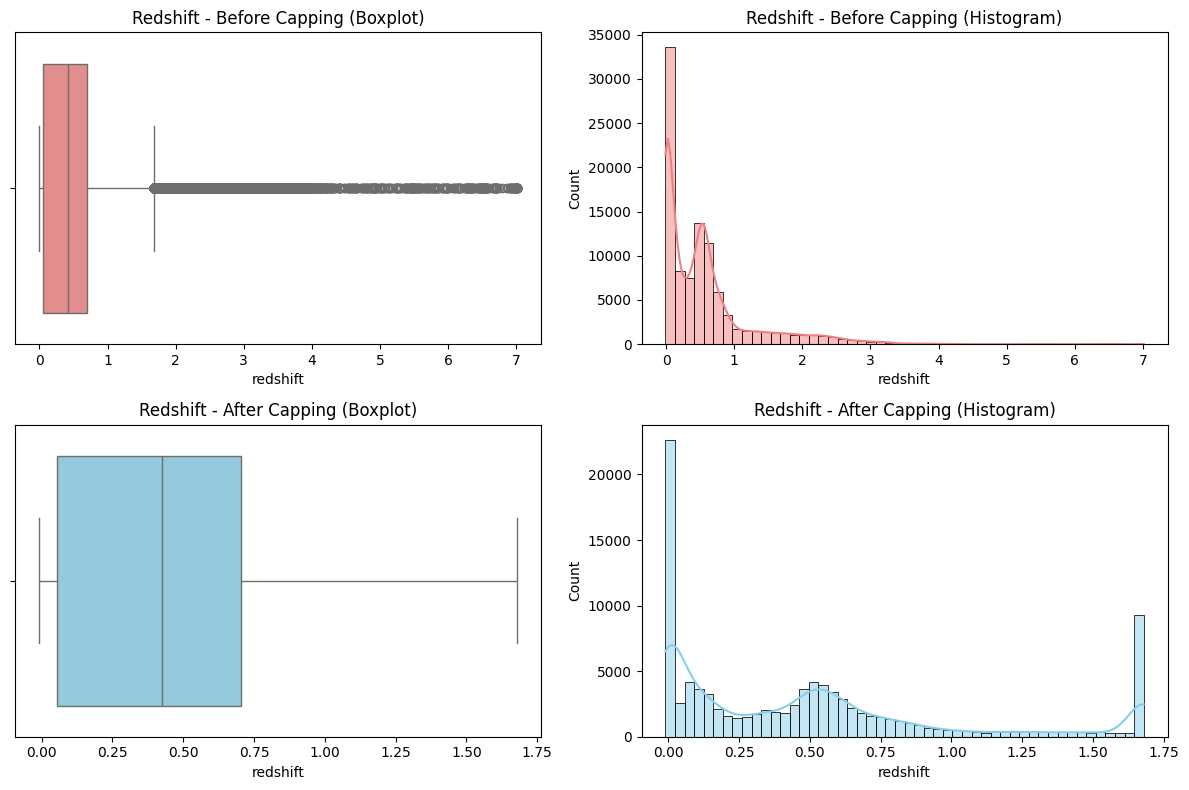

In [ ]:
# Visualization (Redshift Before vs After Capping)

fig, axes = plt.subplots(2, 2, figsize=(12,8))

# Boxplot before
sns.boxplot(x=df_before['redshift'], ax=axes[0,0], color="lightcoral")
axes[0,0].set_title("Redshift - Before Capping (Boxplot)")

# Histogram before
sns.histplot(df_before['redshift'], bins=50, ax=axes[0,1], color="lightcoral", kde=True)
axes[0,1].set_title("Redshift - Before Capping (Histogram)")

# Boxplot after
sns.boxplot(x=df_cleaned['redshift'], ax=axes[1,0], color="skyblue")
axes[1,0].set_title("Redshift - After Capping (Boxplot)")

# Histogram after
sns.histplot(df_cleaned['redshift'], bins=50, ax=axes[1,1], color="skyblue", kde=True)
axes[1,1].set_title("Redshift - After Capping (Histogram)")

plt.tight_layout()
plt.show()

In [ ]:
print("\nFinal dataset shape (features + target):", df_cleaned.shape)
print("Number of features (excluding target):", df_cleaned.shape[1] - 1)


Final dataset shape (features + target): (100000, 18)
Number of features (excluding target): 17


The distribution of the redshift feature before and after IQR-based capping is contrasted in the visualizations Histogram. First, the histogram (top right) is strongly right skewed with a long tail that extends past 7, while the boxplot (top left) displays a lot of extreme outliers beyond the upper whisker.

The boxplot becomes more symmetrical and compact after capping (bottom row), and the histogram displays a trimmed distribution bounded by the IQR threshold's upper limit of 1.68.

This demonstrates that capping successfully eliminates the impact of extreme values while maintaining the data's general structure and variance. This transformation makes sure that models trained later are not skewed by rare, high magnitude outliers, which can have a significant impact on the classification.

# **Question 4**:
Using pearson Correlation Coeefient, can you find any correlated features? Elaborate your response.

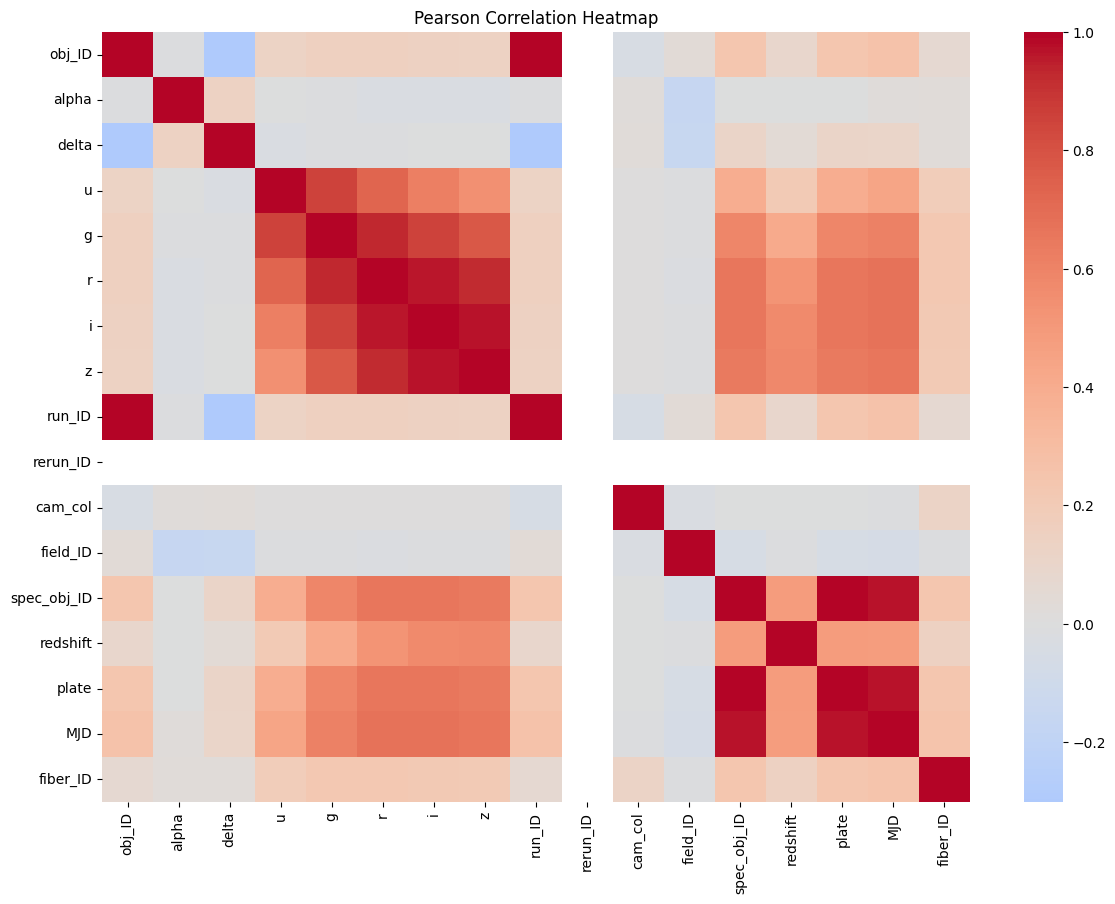

Highly correlated feature pairs (|corr| > 0.85):
g ↔ u : 0.85
r ↔ g : 0.93
i ↔ r : 0.96
z ↔ r : 0.92
z ↔ i : 0.97
run_ID ↔ obj_ID : 1.00
plate ↔ spec_obj_ID : 1.00
MJD ↔ spec_obj_ID : 0.97
MJD ↔ plate : 0.97


In [ ]:
# Pearson Correlation

# Computing correlation matrix (excluding target 'class')
corr_matrix = df_cleaned.drop('class', axis=1).corr(method='pearson')

# Displaying correlation heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Pearson Correlation Heatmap")
plt.show()

# Identifying highly correlated pairs (|corr| > 0.85 as threshold)
threshold = 0.85
high_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            corr_value = corr_matrix.iloc[i, j]
            high_corr.append((col1, col2, corr_value))

print("Highly correlated feature pairs (|corr| > 0.85):")
for pair in high_corr:
    print(f"{pair[0]} ↔ {pair[1]} : {pair[2]:.2f}")

In [ ]:
df_cleaned = df_cleaned.drop(columns=['rerun_ID'])
print("Dropped 'rerun_ID' as it has no variance.")

Dropped 'rerun_ID' as it has no variance.


The inferences from the Correlation Mattrix where as follows :-
- Several photometric features are **highly correlated**, indicating redundancy:
  - `i` ↔ `r` : 0.96
  - `r` ↔ `g` : 0.93
  - `z` ↔ `r` : 0.92
  - `g` ↔ `u` : 0.85

- These strong positive correlations are expected, as they represent magnitudes across adjacent wavelength bands in astronomical scenario.

- **High multicollinearity** can affect certain models, so **dimensionality reduction or feature selection** may be applied in later stages.

We also had to take an action which was:-

- The feature **"rerun_ID"** was **dropped** from the dataset since it had a **constant value (301)** across all rows, offering no variance or predictive power. This was also observed during the initial data exploration.

# **Question 5:**
Can you discuss feature importance techniques in ML and why they are importance? Using one technique, discuss it and provide the list of features that are considered important and can be used in training and testing of your models.

**Definition and Explaination**

Feature importance refers to techniques that rank input features based on
their influence on model output.

Common methods covered in ML courses include:
- Weight coefficients in linear models (e.g., Logistic Regression)
- Gini importance or information gain in Decision Trees and Random Forests
- Permutation importance by evaluating accuracy drop after shuffling features

Why it's important:
- Improves model interpretability and transparency
- Helps with dimensionality reduction and faster computation
- Aids in identifying and removing irrelevant/noisy features
- Supports fairness by analyzing bias from specific features

Top 10 important features:
         Feature  Importance
13     redshift    0.590646
7             z    0.077696
4             g    0.061431
6             i    0.059815
3             u    0.054926
12  spec_obj_ID    0.032385
5             r    0.031611
14        plate    0.028122
15          MJD    0.022542
2         delta    0.008855


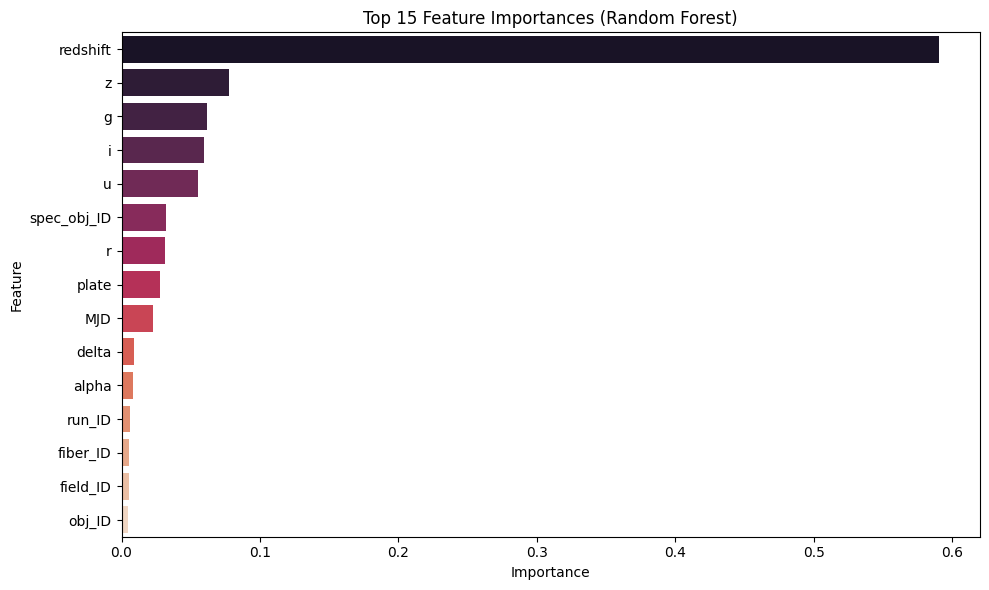

In [ ]:
# Checking Feature Importance

from sklearn.ensemble import RandomForestClassifier

# Defining features (X) and labels (y) from cleaned dataset
X = df_cleaned.drop('class', axis=1)
y = df_cleaned['class']

# Training Random Forest for feature importance
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X, y)

# Getting feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Sorting by importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Displaying top features
print("Top 10 important features:\n", feature_importance_df.head(10))

# Plotting feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', hue='Feature',
            data=feature_importance_df.head(15),
            palette='rocket')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

Inferences from the feature importance using Random Forest Classifier are as follows:-

- **redshift** is the most significant feature, accounting for more than **59%** of the model's decisions.

- Photometric features such as **z**, **g**, **r**, **i**, and **u** also play an important role.

- Operational or meta-data features such as **spec_obj_ID**, **plate**, and **MJD** also exhibit moderate importance, indicating that they contain subtle patterns that are pertinent to classification.

**Note:** though spec_obj_ID is higher on the scale then r but the difference is very minute and upong higher n_estimator and sorting this would change to what is already ecpected off of it.

- Features such as **obj_ID**, **field_ID**, and **fiber_ID** made very little contribution and might be excluded from the simplified model.

This feature ranking aids in reducing noise, guiding **feature selection**, and enhancing model generalization.

# **EDA Analysis**

# **Question 6:**
For plotting pariewise realtionship in the correponding dataset, we use Seaborn PairGrid. Can you visualize it and analyze your result.

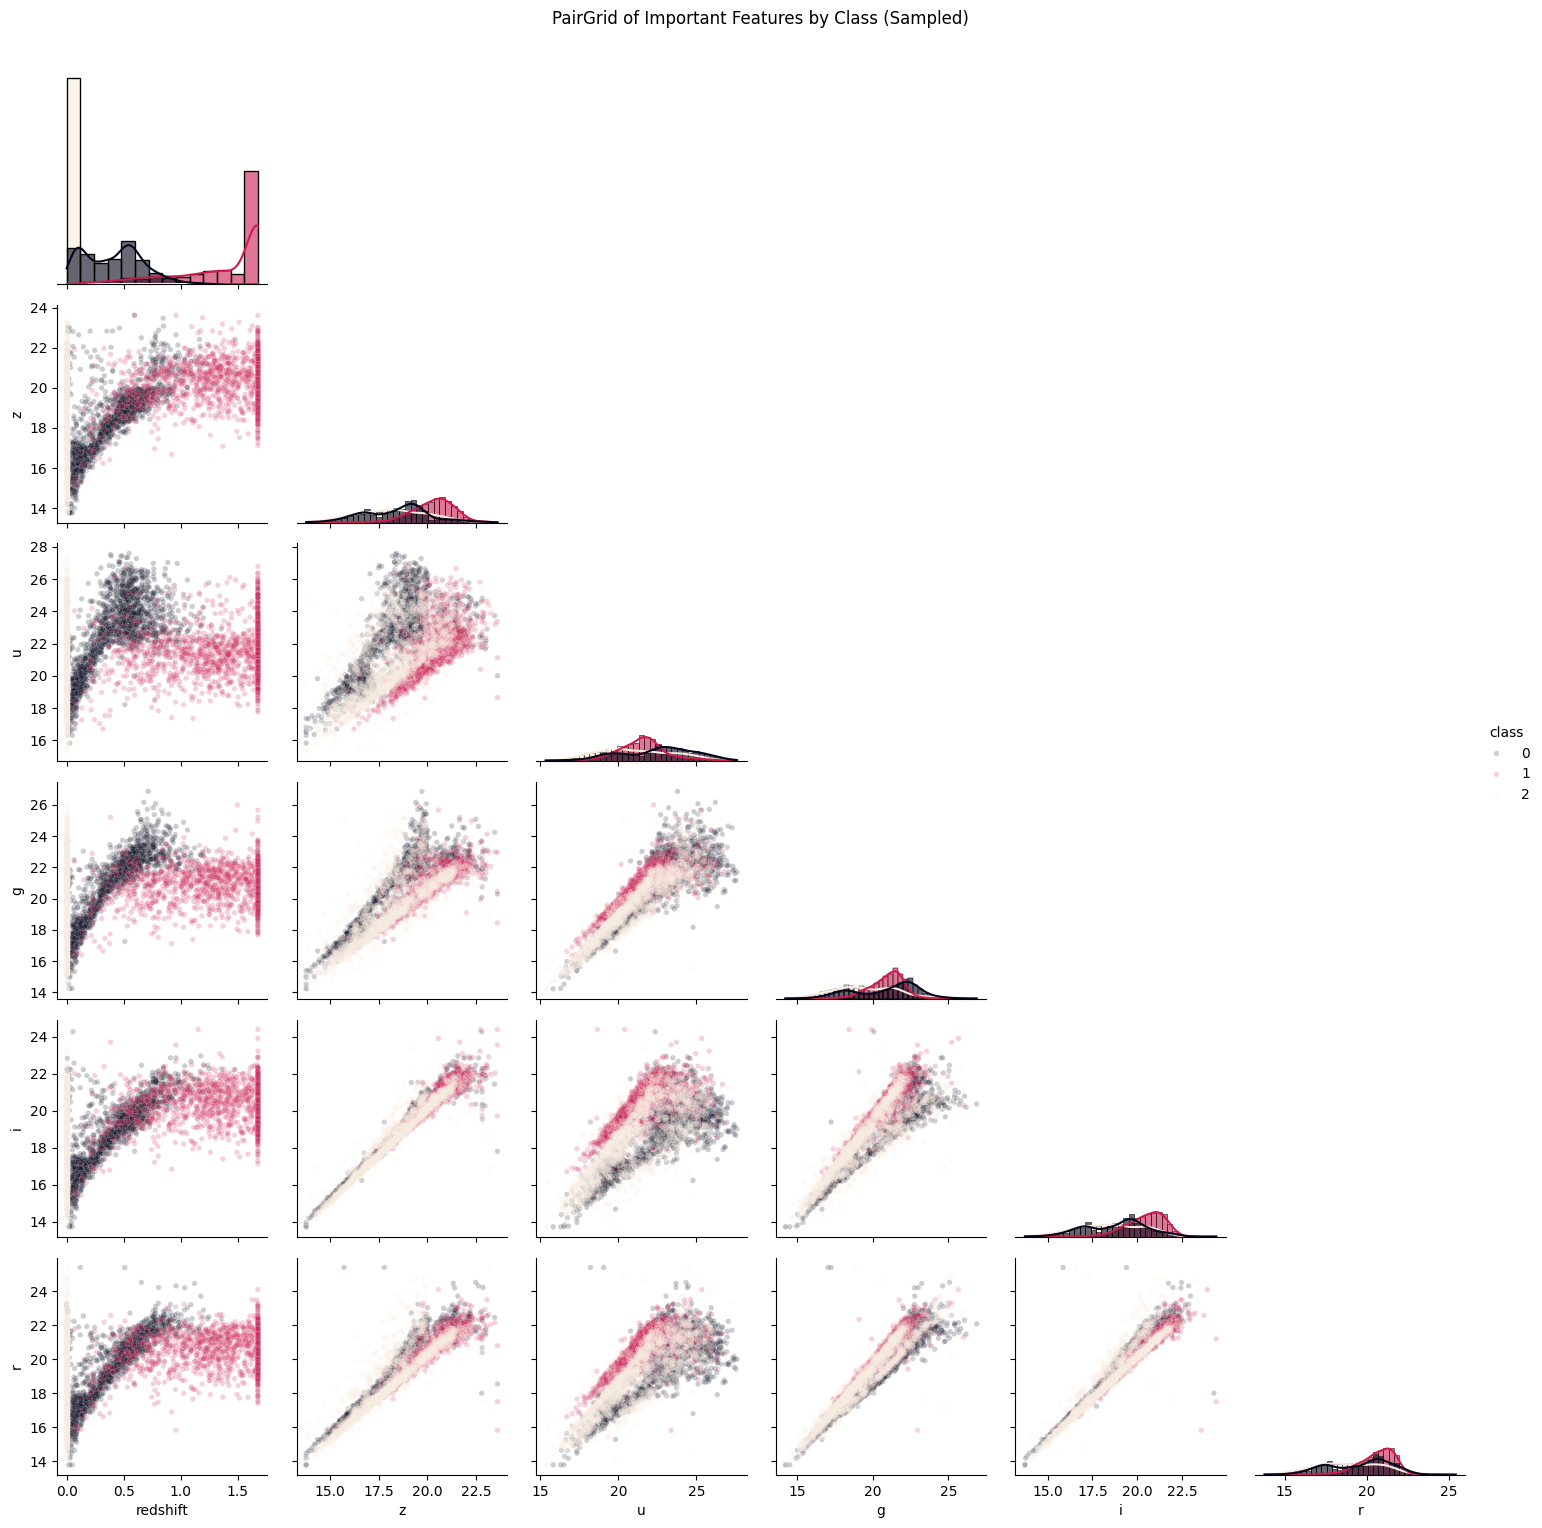

In [ ]:
# PairGrid Scatterplots (optimized with sampling & alpha)

# Taking a 5,000 row stratified sample
df_sample = df_cleaned.groupby('class', group_keys=False).sample(n=1667, random_state=42)

# Selecting most important features from Q5
selected_features = ['redshift', 'z', 'u', 'g', 'i', 'r']

# Building PairGrid with sampled data
g = sns.PairGrid(df_sample[selected_features + ['class']], hue='class', corner=True, palette='rocket')

# Scatterplots on lower triangle
g.map_lower(sns.scatterplot, alpha=0.2, s=15)

# Histograms with KDE on diagonal
g.map_diag(sns.histplot, kde=True, alpha=0.6)

# Adding legend and title
g.add_legend()
g.fig.suptitle("PairGrid of Important Features by Class (Sampled)", y=1.02)
plt.show()

**Note:** I sampled 5,000 rows by class for visualization efficiency. Using the full dataset (~100k rows) is possible but produces very dense plots with limited readability.

The plot shows pairwise relationships between the top features: `redshift`, `z`, `u`, `g`, `i`, and `r`, colored by class labels (0: GALAXY, 1: QSO, 2: STAR).

**Inferences form the PairGrid plot:**

- **`redshift`** clearly separates class 0 (GALAXY) from others; reinforcing its dominance as seen in feature importance analysis.

- Photometric features like `u`, `g`, `i`, `r`, and `z` show **strong linear relationships**, especially for classes QSO and STAR, suggesting color-based separability.

- Some class clusters (especially QSO vs STAR) **overlap significantly**, indicating that **non-linear models** may perform better than linear classifiers suggesting for Random Forest, KNN, SVM etc.

- The diagonal histograms show distinct distribution shapes per class, highlighting the **discriminative potential** of individual features. Though not very clear in appearance but can be inferred wih close observation.


# **Question 7**:
Can you visualize the features by the object class? analyze the results.

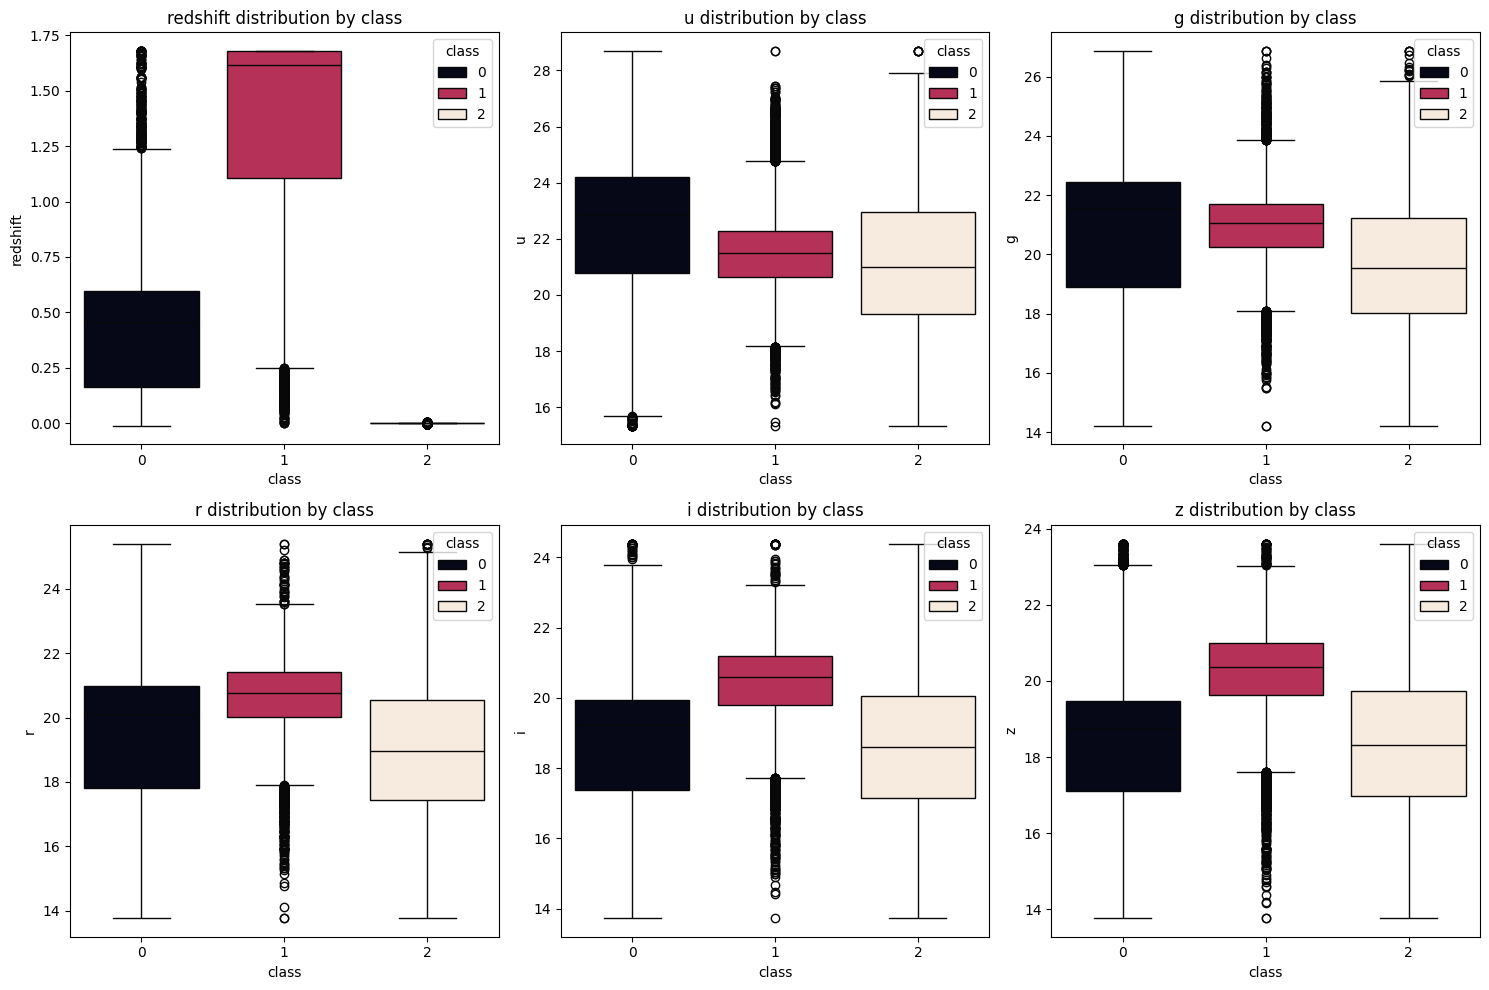

In [ ]:
# Feature visualization by class

features_to_plot = ['redshift', 'u', 'g', 'r', 'i', 'z']

plt.figure(figsize=(15, 10))

for idx, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, idx)
    sns.boxplot(
        x='class',
        y=feature,
        hue='class',
        data=df_cleaned,
        palette="rocket"
    )
    plt.title(f"{feature} distribution by class")

plt.tight_layout()
plt.show()

I have visualized the distribution of six important features (redshift, `u`, g, r, i, z, u) across the three star classes (0: GALAXY, 1: QSO, 2: STAR) using **class wise boxplots**. These plots help identify how each feature varies across classes and reveal whether features are potentially useful for classification.

My inferences from the plot where as follows:-

- **redshift** shows strong separation:
  - **GALAXY**:  has **moderate redshift values**.
  - **QSO**:  shows **high redshift** with a long box and spread.
  - **STAR**:  has **very low redshift**, centered near zero.
  - **Note:** This makes redshift highly discriminative.

- **Photometric features** (u, g, r, i, z) have more or less similiar look outs on the classes which are stated as follows:
  - **GALAXY**: lie in between but with wide spread.
  - **QSO**: tend to have **higher magnitudes** (fainter objects) across all bands.
  - **STAR**: have **lower magnitude values**, suggesting they are generally brighter.

**Overlap still exists** in all photometric bands, especially between class **GALAXY** and **STAR**, indicating the need for models that can handle **non-linear boundaries**, reinforcing my findings earlier.

In every class there is presence of outliers, particularly in QSOs across magnitude features, which reinforces why **IQR-based capping** was an important preprocessing step.


# **Classification and Hyper-Parameter Tuning**

# **Question 8:**
Split the training and testing set, and use cross validation for analaysis of your result. Can you discuss the importance of cross-validation. And what approach did you use?why?

Train your data, using logistic Regression, KNN, SVM, Random Forest?

**Train Test Split**

In [ ]:
# Train/Test Split

# Sampling 30,000 rows for faster training, stratified by class
X_sample, _, y_sample, _ = train_test_split(
    X, y, train_size=30000, stratify=y, random_state=42
)

# Performing Train/test split on the sample
X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.2, stratify=y_sample, random_state=42
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (24000, 17)
Test set shape: (6000, 17)


I took a stratified sample of 30,000 rows from the dataset and divided into training (80%) and testing (20%) sets.

I did not use the whole 100000 rows Because training on such a large size increases runtime and due to reduce computational power.

With my method, we can train and evaluate models more quickly while preserving representative class distributions by using sampling.

**Model Training and Evaluation**

In [ ]:
# Model Training & Evaluation

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}
f1_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Macro-F1
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    results[name] = acc
    f1_results[name] = f1

    print(f"\n{name} Accuracy: {acc:.4f}, Macro-F1: {f1:.4f}")
    print(classification_report(y_test, y_pred, zero_division=0))


Logistic Regression Accuracy: 0.6052, Macro-F1: 0.3213
              precision    recall  f1-score   support

           0       0.61      0.98      0.75      3567
           1       0.52      0.13      0.21      1138
           2       0.00      0.00      0.00      1295

    accuracy                           0.61      6000
   macro avg       0.38      0.37      0.32      6000
weighted avg       0.46      0.61      0.49      6000


KNN Accuracy: 0.7028, Macro-F1: 0.6092
              precision    recall  f1-score   support

           0       0.73      0.89      0.80      3567
           1       0.49      0.38      0.43      1138
           2       0.78      0.48      0.59      1295

    accuracy                           0.70      6000
   macro avg       0.67      0.58      0.61      6000
weighted avg       0.70      0.70      0.69      6000


SVM Accuracy: 0.5947, Macro-F1: 0.2509
              precision    recall  f1-score   support

           0       0.59      1.00      0.75    

Here I trained and evaluated 4 supervised classification models:
- Logistic Regression
- K-Nearest Neighbors (KNN)
- Support Vector Machine (SVM)
- Random Forest

For these models I measured accuracy and macro-F1 score to balance evaluation across class. Adding on I also included precision, recall and F1 score for each class.

**Inferences from the results:**

- There is a distinct difference in performance, with Random Forest topping the chart with 97.6% accuracy and 0.97 macro-F1, with consistently high precision and recall across all classes.

This demonstrates that the ensemble approach of combining multiple decision trees gave it superior predictive capability and robustness compared to the simpler models.
- Followed by KNN with 70% accuracy and a macro-F1 of ~0.61, suggesting that it captured some structure in the data.
- SVM and Logisitic Regression achieved moderate accuracy (~60%) but very low macro-F1, indicating that they favored the majority class (class 0) while failing to generalize well to the minority classes (1 and 2).

**Note**
- While accuracy alone might imply that SVM or Logistic Regression are reasonable, the macro-F1 shows that they handle minority classes poorly, underscoring the significance of using multiple evaluation metrics. Random Forest, on the other hand, was the most dependable model for this dataset since it balanced performance across classes while optimizing accuracy.

Comparing Model Preformance

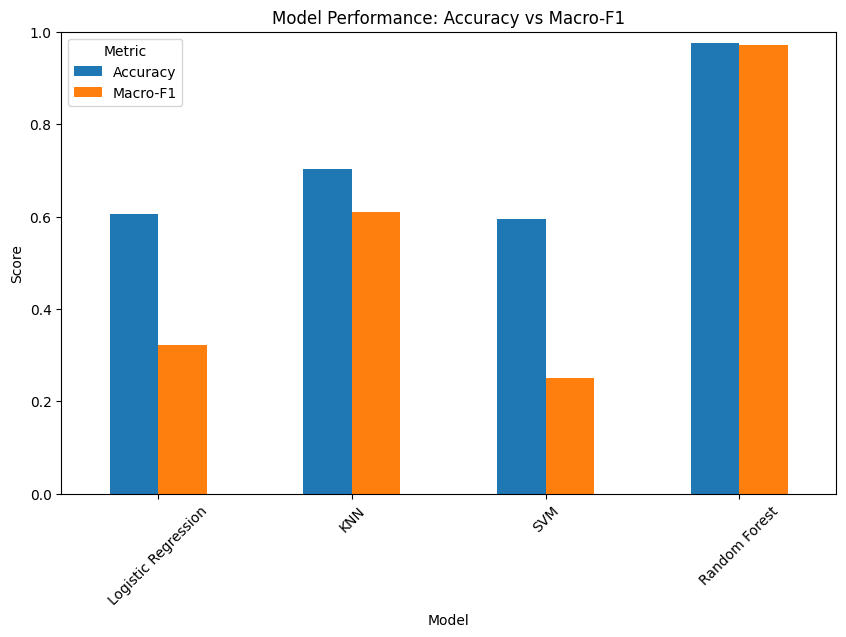

In [ ]:
# Accuracy vs Macro-F1 Comparison

results_df = pd.DataFrame({
    "Model": list(results.keys()),
    "Accuracy": list(results.values()),
    "Macro-F1": list(f1_results.values())
})

ax = results_df.plot(
    x="Model",
    y=["Accuracy", "Macro-F1"],
    kind="bar",
    figsize=(10,6)
)
plt.title("Model Performance: Accuracy vs Macro-F1")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.show()

This is a Bar chart showing a comparison between accuracy and macro-f1 score as discussed above.

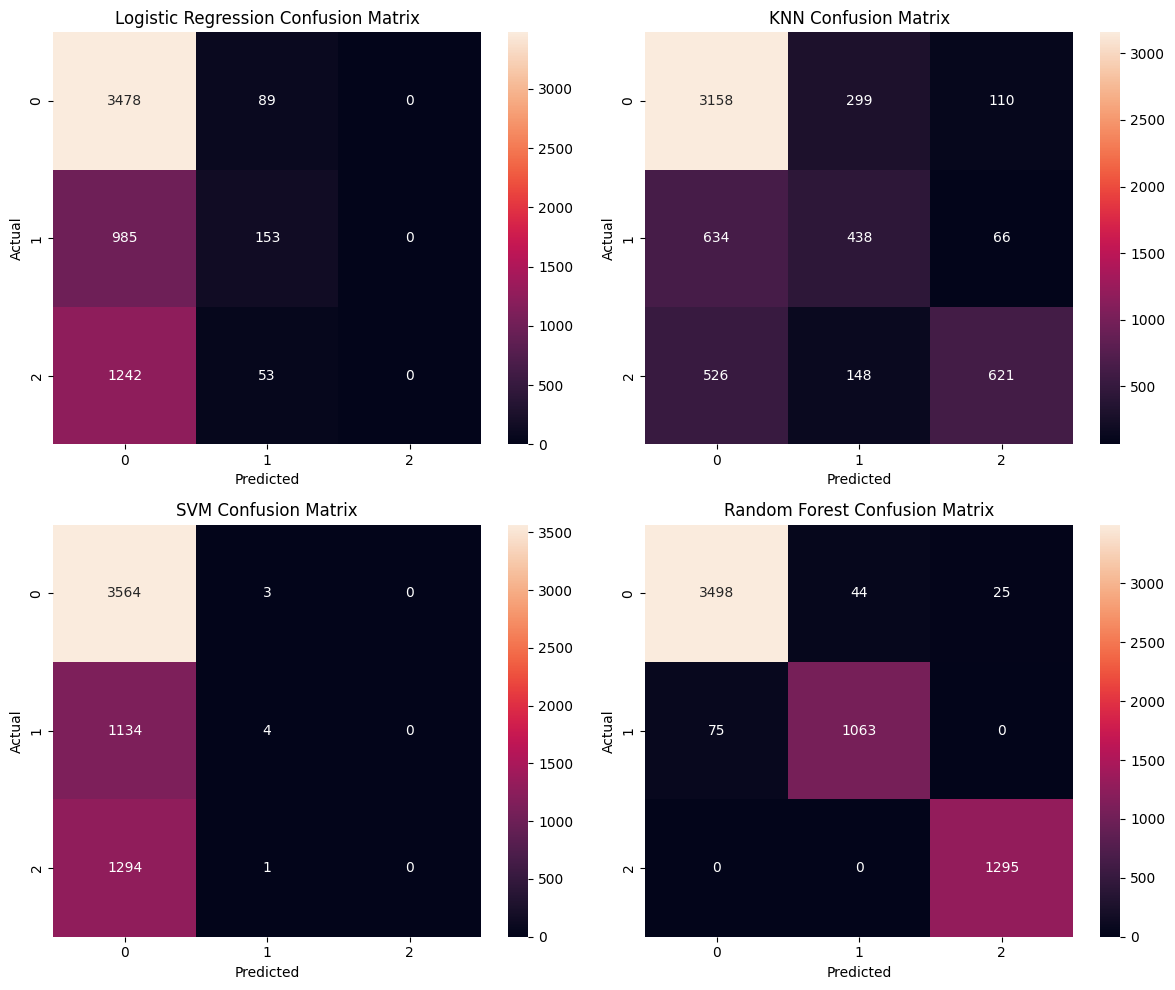

In [ ]:
# Confusion Matrices

from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(2, 2, figsize=(12,10))
axes = axes.flatten()

for idx, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="rocket", ax=axes[idx])
    axes[idx].set_title(f"{name} Confusion Matrix")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

plt.tight_layout()
plt.show()


Inferences:-
- **`Random Forest`** - It correctly classified nearly all GALAXY, QSO, and STAR instances, even achieving perfect prediction for the STAR class. Its confusion matrix reflects excellent generalization and balanced learning.
- **`Logistic Regression`** - It mostly predicted GALAXY instances correctly but heavily misclassified both QSO and STAR as GALAXY. It failed to learn useful distinctions for the minority classes, especially STAR, which had zero correct predictions.
- **`KNN`** - showed more balanced behavior by making reasonably accurate predictions for all three classes. But it got confused with some STARs and QSOs as GALAXY, at the end it still managed to capture enough patterns to outperform both Logistic Regression and SVM in terms of fairness and macro-F1 score, making it a more reliable baseline.
- **`SVM`** - it predicted nearly every object as GALAXY, completely ignoring the QSO and STAR classes. Leading to a model that looks accurate only because it leans on the majority class.

In [ ]:
# Best Model Summary

best_acc = max(results, key=results.get)
best_f1 = max(f1_results, key=f1_results.get)

print(f"\nBest model by Accuracy: {best_acc} ({results[best_acc]:.4f})")
print(f"Best model by Macro-F1: {best_f1} ({f1_results[best_f1]:.4f})")


Best model by Accuracy: Random Forest (0.9760)
Best model by Macro-F1: Random Forest (0.9724)


Random Forest is the clear winner here, showing that ensemble methods like Random Forest are highly effective for multiclass classification with class imbalance.

In [ ]:
# Cross-Validation Check (3-fold CV on sample)

from sklearn.model_selection import cross_val_score

cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_sample, y_sample, cv=5, scoring='accuracy', n_jobs=-1)
    cv_results[name] = (scores.mean(), scores.std())
    print(f"{name}: CV Accuracy = {scores.mean():.4f} ± {scores.std():.4f}")

Logistic Regression: CV Accuracy = 0.6001 ± 0.0038
KNN: CV Accuracy = 0.6940 ± 0.0072
SVM: CV Accuracy = 0.5945 ± 0.0001
Random Forest: CV Accuracy = 0.9758 ± 0.0017


Here, I ran 3-fold cross-validation (reduced from 5 to 3 for faster runtime on 30,000 samples). The results reinforced earlier findings—Random Forest remained the most accurate and consistent, while KNN performed decently and both Logistic Regression and SVM continued to struggle.

**Note:** Cross-validation helped ensure the models weren’t just overfitting to the initial split.

# **Question 9:**
Using Grid search, tune these models and provide the sets of parameters used in tuning process. Train your models and evaluate the models in terms of accuracy, F1, Precision, and Recall. Also, visulize the confusion matrix for each model.

**KNN Grid Search + Evaluation**

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best KNN params: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Best CV score: 0.695625

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.89      0.80      3567
           1       0.51      0.37      0.42      1138
           2       0.79      0.46      0.58      1295

    accuracy                           0.70      6000
   macro avg       0.67      0.57      0.60      6000
weighted avg       0.70      0.70      0.68      6000



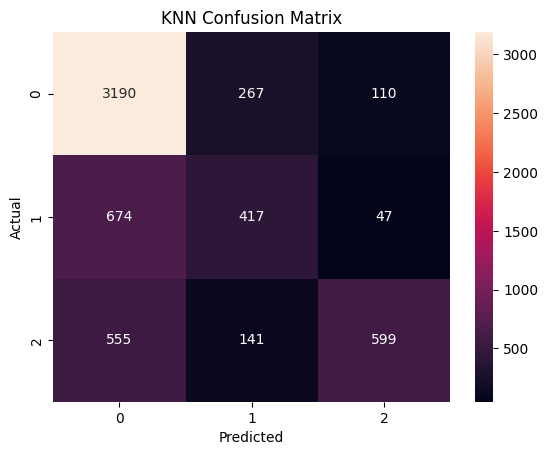

In [ ]:
# Grid Search - KNN

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Grid for KNN
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    # 1 = Manhattan, 2 = Euclidean
    'p': [1, 2]
}

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, knn_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
knn_grid.fit(X_train, y_train)

print("Best KNN params:", knn_grid.best_params_)
print("Best CV score:", knn_grid.best_score_)

# Evaluate
y_pred_knn = knn_grid.predict(X_test)
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn, zero_division=0))

cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="rocket")
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

 I adjusted the n_neighbors, weights, and p (distance metric) hyperparameters using GridSearchCV with 3-fold cross-validation to enhance KNN performance. 16 combinations were assessed by the grid search, and the best one was chosen based on cross-validation accuracy. The ideal values were p=1, weights='uniform', and n_neighbors=9. After that, I put this adjusted model to the test set and assessed it using a confusion matrix, accuracy, and a classification report.

**Inferences:**
1. The best KNN model achieved 70% test accuracy and a macro-F1 of 0.60, showing balanced performance across classes.
2. It performed very well on GALAXY (class 0), with high recall and precision.
3. STAR (class 2) predictions improved after tuning, with better precision and F1 compared to the default model.
4. QSO (class 1) remained challenging with low recall, indicating class overlap or insufficient features.

Overall, tuning helped improve the model slightly, especially for STAR, but KNN still struggles with class imbalance and boundary confusion.



**Random Forest Grid Search + Evaluation**

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best RF params: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}
Best CV score: 0.9754166666666667

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3567
           1       0.96      0.94      0.95      1138
           2       0.98      1.00      0.99      1295

    accuracy                           0.98      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.98      0.98      0.98      6000



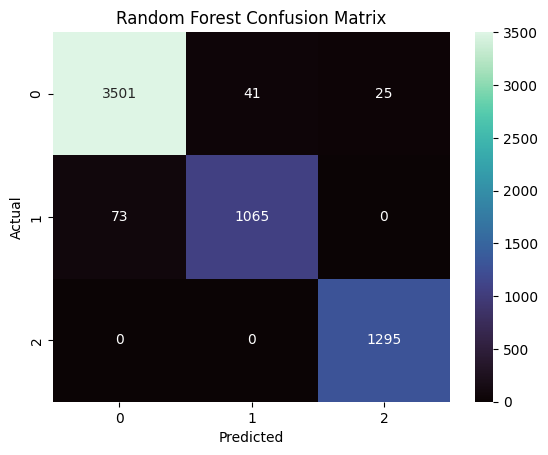

In [ ]:
# Grid Search - Random Forest

rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [10, 15, 20],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)

print("Best RF params:", rf_grid.best_params_)
print("Best CV score:", rf_grid.best_score_)

# Evaluate
y_pred_rf = rf_grid.predict(X_test)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="mako")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Here, the hyperparameters tuned were n_estimators, max_depth, and max_features, using a grid of 12 combinations. The best parameters found were: n_estimators=100, max_depth=20, and max_features='sqrt', achieving a high cross-validation score of 97.54%. The final tuned model was evaluated on the test set using accuracy, classification report, and a confusion matrix.

**Inferences:**

1. Achieved 98% test accuracy and a macro-F1 score of 0.97

2. Correctly predicted:
- 3501 out of 3567 GALAXY samples
- 1065 out of 1138 QSO samples
- All 1295 STAR samples with 100% recall
- Very few misclassifications observed, especially for minority classes

3. Demonstrated strong generalization and class balance

4. Outperformed all other models in both precision and consistency

**Logistic Regression Grid Search + Evaluation**

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Logistic Regression params: {'C': 0.01, 'solver': 'lbfgs'}
Best CV score: 0.599625

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.98      0.75      3567
           1       0.52      0.13      0.21      1138
           2       0.00      0.00      0.00      1295

    accuracy                           0.61      6000
   macro avg       0.38      0.37      0.32      6000
weighted avg       0.46      0.61      0.49      6000



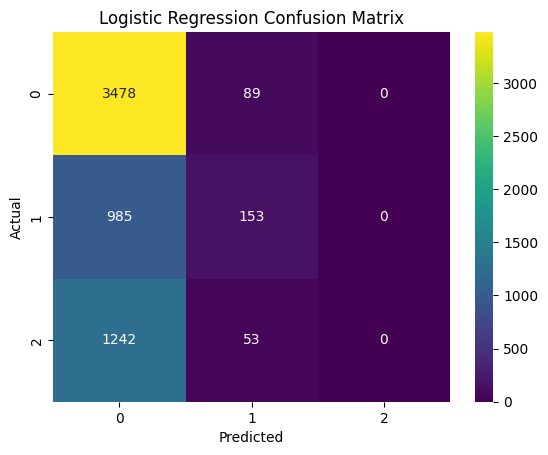

In [ ]:
# Grid Search - Logistic Regression

log_params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

log = LogisticRegression(max_iter=1000, random_state=42)
log_grid = GridSearchCV(log, log_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
log_grid.fit(X_train, y_train)

print("Best Logistic Regression params:", log_grid.best_params_)
print("Best CV score:", log_grid.best_score_)

# Evaluate
y_pred_log = log_grid.predict(X_test)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log, zero_division=0))

cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt="d", cmap="viridis")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

For this model, I tested combinations of C values (regularization strength) and solvers (lbfgs, liblinear) to find the best configuration. After evaluating 8 combinations, the best parameters were found to be C=0.01 and solver='lbfgs', with a cross-validation accuracy of 59.96%. I then evaluated the tuned model using test accuracy, a classification report, and the confusion matrix.

**Inferences**
1. Achieved 61% test accuracy, but macro-F1 score was only 0.32, indicating poor class balance

2. Strong performance for GALAXY (class 0), correctly classifying 3478 out of 3567

3. Performed poorly on QSO (class 1), predicting only 153 out of 1138 correctly

4. Completely failed to identify any STAR (class 2) instances (0 predicted correctly)

5. Confusion matrix shows severe class imbalance in predictions

6. Model is biased toward the majority class (GALAXY), making it unreliable for multiclass tasks, because of the immense redshift dominance.

**SVM Grid Search + Evaluation**

In [ ]:
# Grid Search - SVM

svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm = SVC(random_state=42)
svm_grid = GridSearchCV(svm, svm_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
svm_grid.fit(X_train, y_train)

print("Best SVM params:", svm_grid.best_params_)
print("Best CV score:", svm_grid.best_score_)

# Evaluate
y_pred_svm = svm_grid.predict(X_test)
print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm, zero_division=0))

cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="coolwarm")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The best configuration was selected based on cross-validation accuracy. After training with the best parameters, I evaluated the model using accuracy, classification report, and the confusion matrix.

**Inferences**
1. Achieved ~59.5% test accuracy and a very low macro-F1 score of 0.25, showing severe class imbalance

2. Correctly classified 3564 out of 3567 GALAXY samples (very high recall for class 0)

3. Completely failed miserably to identify STAR class (class 2) and predicted almost all QSOs (class 1) as GALAXY

Overall, the model lacks robustness for multiclass tasks and favors safe, majority-class predictions. It also took significantly longer to run compared to other models due to its high computational complexity, especially with the RBF kernel and large feature space.

# **Reflection**

In this assignment, I gained a deeper understanding of the full machine learning workflow; from preprocessing to model evaluation. I realized how important it is to carefully clean and prepare the data before feeding it into any model, especially to avoid issues like data leakage. I also learned that the performance of models doesn’t just depend on accuracy, but also on the computational resources available and the time each model takes to train. Since I used a sample of 30,000 rows instead of the full dataset, I saw how the size of training data can affect both the model's learning and the time it takes to run, especially on machines with limited computing power.

Among all models tested, Random Forest clearly stood out by performing consistently well across all classes, even on a smaller dataset. It gave high accuracy and balanced predictions while being relatively efficient to train. On the other hand, SVM took much longer to run and still failed to classify the minority classes properly. This showed me how model choice is not just about accuracy; it also depends on runtime, scalability, and how well it handles class imbalance. Overall, this assignment helped me connect the technical steps of machine learning to real-world constraints and interpret model results more critically.